### Assignment 5
### EE18BTECH11001
### Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
x = np.array([2.12, 2.71, 3.44, 2.76, 2.72 ,0.96, 2.00, 3.26 ,2.50, 1.20 ,1.62, 
              1.30 ,1.96 ,2.60 ,1.30 ,2.67, 4.40 ,1.80, 4.90, 2.39, 1.62, 1.47, 0.89, 2.52, 1.21, 0.90, 0.80])
print('p value of density:', stats.shapiro(x)[1])
print('p value of log(density) :', stats.shapiro(np.log(x))[1])

p value of density: 0.051220282912254333
p value of log(density) : 0.5660613775253296


p value of log(density) > p value of density, 

so we cannot reject the null hypothesis that the samples belong to gaussian distribution. 

In [3]:
mu1, std1 = stats.norm.fit(x)
mu2, std2 = stats.norm.fit(np.log(x))
t=np.linspace(-7, 7, 100)
n1 = stats.norm.pdf(t, mu1, std1)
n2 = stats.norm.pdf(t, mu2, std2)

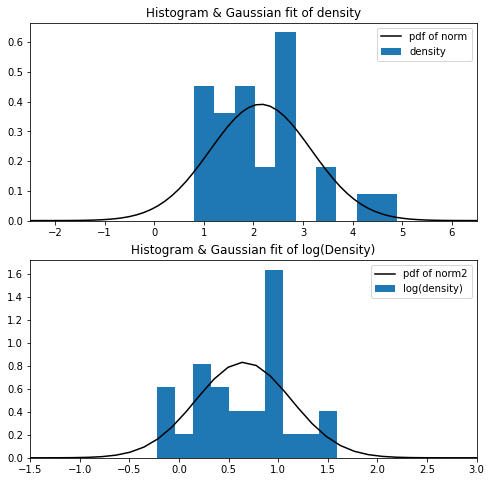

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].plot(t, n1,'k-', label='pdf of norm')
ax[0].hist(x, density = True, label='density')
ax[0].legend()
ax[0].set_xlim([-2.5, 6.5])
ax[0].set_title('Histogram & Gaussian fit of density')

ax[1].plot(t, n2,'k-', label='pdf of norm2')
ax[1].hist(np.log(x), density = True, label='log(density)')
ax[1].legend()
ax[1].set_xlim([-1.5, 3])
ax[1].set_title('Histogram & Gaussian fit of log(Density)')

plt.show()

histogram of log(Density) is a better fit compared to standard Density.

### Q2

In [5]:
x = np.genfromtxt("https://iith.ac.in/~shantanud/HIP_star.dat")[1:]
x = np.append(x,np.ones((len(x),1)) , axis = 1)
x[:,-1] = np.array(range(len(x)))
hyades = x[x[:,2]>50]
hyades = hyades[hyades[:,2]<100]
hyades = hyades[hyades[:,3]>0]
hyades = hyades[hyades[:,3]<25]
hyades = hyades[hyades[:,5]>90]
hyades = hyades[hyades[:,5]<130]
hyades = hyades[hyades[:,6]>-60]
hyades = hyades[hyades[:,6]<-10]
hyades = hyades[hyades[:,7]<5]
hyades = hyades[hyades[:,8]<0.2]
nonhyades = np.delete(x, hyades[:,-1].astype(np.int),axis=0)

In [6]:
data1 = hyades[:,-2]
data2 = nonhyades[:,-2]
data2 = data2[~np.isnan(data2)]

print("Variance of hyades color array :", np.var(data1))
print("Variance of non-hyades color array :", np.var(data2))

Variance of hyades color array : 0.001848
Variance of non-hyades color array : 0.10768933532979119


Clearly we have different number of samples as well as variance. 

We therby use ttest_ind

In [7]:
stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)

print("t-statistic: ",stat)
print("p-value of the 2 sample t-test : ",p_val)

t-statistic:  -30.467874175004038
p-value of the 2 sample t-test :  6.291256969608912e-08


Cleary the p value << 0.05, we can reject our null hypothesis that the colors of hyades
and non-hyades are the same.
2 star categories don't have the same color. 